# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
import warnings
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

In [2]:
def load_dataset(file_path):
    return pd.read_xlsx(file_path, infer_datetime_format=True)

file_path = "S1 File.csv"
dataset = pd.read_excel("S1 File.xlsx")

print(dataset.dtypes)

Census tract                                      float64
The number of crime incidents                      object
Total population                                    int64
Male population                                     int64
Percent of male population                        float64
                                                   ...   
Percent of population of public administration    float64
Population of other services                        int64
Percent of population of other services           float64
Median income                                     float64
Mean income                                       float64
Length: 79, dtype: object


In [3]:
print(dataset.isnull().sum())

Census tract                                      0
The number of crime incidents                     0
Total population                                  0
Male population                                   0
Percent of male population                        3
                                                 ..
Percent of population of public administration    4
Population of other services                      0
Percent of population of other services           4
Median income                                     5
Mean income                                       3
Length: 79, dtype: int64


In [4]:
print(dataset.describe())

       Census tract  Total population  Male population  \
count    801.000000        801.000000       801.000000   
mean    4053.564657       3415.106117      1655.796504   
std     2779.699256       1785.690957       926.397624   
min      101.000000          0.000000         0.000000   
25%     1609.000000       2026.000000       949.000000   
50%     3515.000000       3119.000000      1500.000000   
75%     6704.000000       4498.000000      2156.000000   
max     9801.000000      17582.000000      8890.000000   

       Percent of male population  Female population  \
count                  798.000000         801.000000   
mean                    48.035088        1759.309613   
std                      4.964584         904.281797   
min                     25.800000           0.000000   
25%                     44.725000        1040.000000   
50%                     48.400000        1600.000000   
75%                     51.200000        2350.000000   
max                     88.80

In [5]:
dataset.dropna(inplace=True)

print(dataset.isnull().sum())

Census tract                                      0
The number of crime incidents                     0
Total population                                  0
Male population                                   0
Percent of male population                        0
                                                 ..
Percent of population of public administration    0
Population of other services                      0
Percent of population of other services           0
Median income                                     0
Mean income                                       0
Length: 79, dtype: int64


In [6]:
print(dataset.duplicated().sum())

0


In [7]:
num_rows = dataset.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 790


In [8]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset)

normalized_df = pd.DataFrame(normalized_data, columns=dataset.columns)


print(normalized_df.head())

   Census tract  The number of crime incidents  Total population  \
0      0.000000                       0.174549          0.219840   
1      0.000121                       0.139701          0.388420   
2      0.000122                       0.141568          0.121570   
3      0.000240                       0.111077          0.337741   
4      0.000360                       0.069073          0.251354   

   Male population  Percent of male population  Female population  \
0         0.177918                    0.183391           0.262866   
1         0.391719                    0.342561           0.385033   
2         0.115699                    0.294118           0.127597   
3         0.343301                    0.349481           0.332035   
4         0.221507                    0.238754           0.281988   

   Percent of female population  Median age  Under 16 years  \
0                      0.816609    0.367391        0.337440   
1                      0.657439    0.319565       

# REGRESSION MODELS

In [9]:
from sklearn.model_selection import train_test_split
dependent_variable = 'The number of crime incidents'
independent_variables = [col for col in dataset.columns if col != dependent_variable]

X = dataset[independent_variables]
y = dataset[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_squared_error_mlr = np.sqrt(mean_squared_error(y_test, y_pred))
relative_abs_error = mean_abs_error / np.mean(np.abs(y_test))
root_relative_squared_error = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(np.abs(y_test))
r2_mlr = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Root Mean Squared Error: {root_mean_squared_error_mlr}")
print(f"Relative Absolute Error: {relative_abs_error}")
print(f"Root Relative Squared Error: {root_relative_squared_error}")
print(f"R-squared: {r2_mlr}")

Mean Absolute Error: 139.49385630933546
Root Mean Squared Error: 323.6028419432187
Relative Absolute Error: 0.40528915056499515
Root Relative Squared Error: 0.9402042814039565
R-squared: -0.582178429361939


Top 20 Feature Importance:
Total population                              1.838113e+11
Male population                               8.844460e+10
Female population                             8.844460e+10
Under 16 years                                6.444231e+10
Percent of female population                  4.626615e+10
Percent of male population                    4.626615e+10
Not Hispani or Latino                         4.219503e+10
Hispanic or Latino                            4.219503e+10
Over 16 years                                 4.099393e+10
Percent of under 16 years                     2.809464e+10
Percent of over 16 years                      2.809464e+10
Population in labor force                     2.344838e+10
Population not in labor force                 1.535860e+10
White                                         1.127061e+10
Some other race                               1.127061e+10
Asian                                         1.127061e+10
Black or African American    

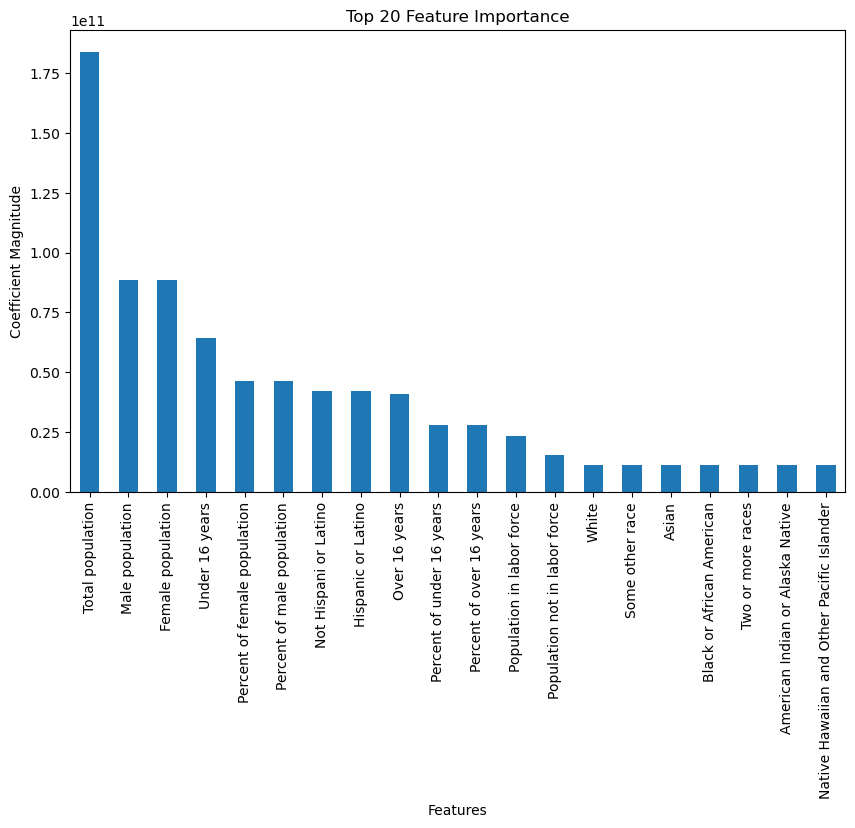

In [10]:
feature_importance = pd.Series(model.coef_, index=independent_variables)
sorted_importance = feature_importance.abs().nlargest(20)  
print("Top 20 Feature Importance:")
print(sorted_importance)

plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title("Top 20 Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

top_features = sorted_importance.index[:20]

X_top_features = X_train[top_features]
from sklearn.linear_model import LinearRegression

model_top_features = LinearRegression()
model_top_features.fit(X_top_features, y_train)

print("Coefficients of the linear regression model with top 20 features:")
print(model_top_features.coef_)

Coefficients of the linear regression model with top 20 features:
[-4.82836425e+11  1.81993514e+11  1.81993514e+11  2.25725824e+11
  5.70144153e+09  5.70144153e+09  7.21379270e+09  7.21379270e+09
  2.50321914e+11 -8.51809158e+08 -8.51809167e+08 -2.45960902e+10
 -2.45960902e+10  6.79032945e+10  6.79032945e+10  6.79032945e+10
  6.79032945e+10  6.79032945e+10  6.79032945e+10  6.79032945e+10]


In [12]:
X_test_top_features = X_test[top_features]
y_pred_top_features = model_top_features.predict(X_test_top_features)

mean_abs_error_top = mean_absolute_error(y_test, y_pred_top_features)
root_mean_squared_error_top = np.sqrt(mean_squared_error(y_test, y_pred_top_features))
relative_abs_error_top = mean_abs_error_top / np.mean(np.abs(y_test))
root_relative_squared_error_top = np.sqrt(np.mean((y_test - y_pred_top_features) ** 2)) / np.mean(np.abs(y_test))
r2_mlr_imp = r2_score(y_test, y_pred_top_features)

print(f"Mean Absolute Error: {mean_abs_error_top}")
print(f"Root Mean Squared Error: {root_mean_squared_error_top}")
print(f"Relative Absolute Error: {relative_abs_error_top}")
print(f"Root Relative Squared Error: {root_relative_squared_error_top}")
print(f"R-squared: {r2_mlr_imp}")

Mean Absolute Error: 130.1940844572043
Root Mean Squared Error: 220.49416396550964
Relative Absolute Error: 0.37826934672474355
Root Relative Squared Error: 0.6406295931768544
R-squared: 0.2654438429445195


In [13]:
#svr
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mean_abs_error_svr = mean_absolute_error(y_test, y_pred_svr)
root_mean_squared_error_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
relative_abs_error_svr = mean_abs_error_svr / np.mean(np.abs(y_test))
root_relative_squared_error_svr = np.sqrt(np.mean((y_test - y_pred_svr) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_svr)

print("SVR Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_svr}")
print(f"Root Mean Squared Error: {root_mean_squared_error_svr}")
print(f"Relative Absolute Error: {relative_abs_error_svr}")
print(f"Root Relative Squared Error: {root_relative_squared_error_svr}")
print(f"R-squared: {r2}")

SVR Model Metrics:
Mean Absolute Error: 174.3684236943464
Root Mean Squared Error: 254.4018884174016
Relative Absolute Error: 0.5066146437856371
Root Relative Squared Error: 0.7391459952915439
R-squared: 0.022151741328030106


In [14]:
#svr improved
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.5, 1],
    'svr__kernel': ['linear', 'poly', 'rbf']
}


numeric_features = [col for col in X_top_features.columns if X_top_features[col].dtype in ['int64', 'float64']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svr', SVR())])

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_top_features, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

best_svr_model = grid_search.best_estimator_

y_pred_grid = best_svr_model.predict(X_test_top_features)

mean_abs_error_grid = mean_absolute_error(y_test, y_pred_grid)
root_mean_squared_error_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
relative_abs_error_grid = mean_abs_error_grid / np.mean(np.abs(y_test))
root_relative_squared_error_grid = np.sqrt(np.mean((y_test - y_pred_grid) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_grid)

print("\nImproved SVR Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_grid}")
print(f"Root Mean Squared Error: {root_mean_squared_error_grid}")
print(f"Relative Absolute Error: {relative_abs_error_grid}")
print(f"Root Relative Squared Error: {root_relative_squared_error_grid}")
print(f"R-squared: {r2}")

Best parameters found: {'svr__C': 100, 'svr__epsilon': 1, 'svr__kernel': 'rbf'}
Best RMSE score found: 214.17440781633942

Improved SVR Model Metrics:
Mean Absolute Error: 95.99666491207594
Root Mean Squared Error: 136.82866363914673
Relative Absolute Error: 0.2789112568012357
Root Relative Squared Error: 0.3975456290797372
R-squared: 0.7171312469657409


In [15]:
# Get the results of the grid search
results = grid_search.cv_results_

# Get the hyperparameters and corresponding scores
params = results['params']
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Create a DataFrame to store the results
results_df = pd.DataFrame({'params': params,
                           'mean_test_score': mean_test_scores,
                           'std_test_score': std_test_scores})

# Display the DataFrame
# Sort the results DataFrame by mean_test_score in descending order
results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)

# Select the top 5 results
top_results = results_df_sorted.head(10)

# Display the top 5 results
print(top_results)

# Define the file path for the Excel file
file_path = 'top_results.xlsx'

# Store the top_results DataFrame in an Excel file
top_results.to_excel(file_path, index=False)

print(f"Top results saved to {file_path}")


                                               params  mean_test_score  \
47  {'svr__C': 100, 'svr__epsilon': 1, 'svr__kerne...    -45870.676963   
44  {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__ker...    -45872.851668   
41  {'svr__C': 100, 'svr__epsilon': 0.2, 'svr__ker...    -45874.829696   
38  {'svr__C': 100, 'svr__epsilon': 0.1, 'svr__ker...    -45875.248112   
39  {'svr__C': 100, 'svr__epsilon': 0.2, 'svr__ker...    -47227.249578   
42  {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__ker...    -47227.993861   
36  {'svr__C': 100, 'svr__epsilon': 0.1, 'svr__ker...    -47230.742104   
45  {'svr__C': 100, 'svr__epsilon': 1, 'svr__kerne...    -47235.469255   
33  {'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel...    -47537.086661   
24  {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__kern...    -47537.287830   

    std_test_score  
47    47860.505926  
44    47870.658668  
41    47877.036293  
38    47876.380548  
39    47109.666593  
42    47093.922113  
36    47110.280955  
45    47079.64050

In [16]:
#xgboost model
X = X_top_features
y = y_train

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-cv_scores.mean())
print(f"XGBoost RMSE: {xgb_rmse}")

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mean_abs_error_xgb = mean_absolute_error(y_test, y_pred_xgb)
root_mean_squared_error_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
relative_abs_error_xgb = mean_abs_error_xgb / np.mean(np.abs(y_test))
root_relative_squared_error_xgb = np.sqrt(np.mean((y_test - y_pred_xgb) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_xgb}")
print(f"Root Mean Squared Error: {root_mean_squared_error_xgb}")
print(f"Relative Absolute Error: {relative_abs_error_xgb}")
print(f"Root Relative Squared Error: {root_relative_squared_error_xgb}")
print(f"R-squared: {r2}")

XGBoost RMSE: 220.84071186007637

XGBoost Model Metrics:
Mean Absolute Error: 106.27302896523777
Root Mean Squared Error: 149.41816431862392
Relative Absolute Error: 0.3087684775290555
Root Relative Squared Error: 0.4341234983237265
R-squared: 0.6626834899558307


In [ ]:
#improved xgboost - RMSE
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_searchxg = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_searchxg.fit(X_train, y_train)

print("\nBest XGBoost parameters found:", grid_searchxg.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_searchxg.best_score_))

best_xgb_model = grid_search.best_estimator_
y_pred_xgb_tuned = grid_searchxg.best_estimator_.predict(X_test)

mean_abs_error_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
root_mean_squared_error_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
relative_abs_error_xgb_tuned = mean_abs_error_xgb_tuned / np.mean(np.abs(y_test))
root_relative_squared_error_xgb_tuned = np.sqrt(np.mean((y_test - y_pred_xgb_tuned) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_xgb_tuned)

print("\nImproved XGBoost Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_xgb_tuned}")
print(f"Root Mean Squared Error: {root_mean_squared_error_xgb_tuned}")
print(f"Relative Absolute Error: {relative_abs_error_xgb_tuned}")
print(f"Root Relative Squared Error: {root_relative_squared_error_xgb_tuned}")
print(f"R-squared: {r2}")

In [ ]:
#Improved XGBoost with top features alone - RMSE
# Select only the top features
top_features = sorted_importance.index
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#improved xgboost
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_searchxg = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_searchxg.fit(X_train_top, y_train)

print("\nBest XGBoost parameters found:", grid_searchxg.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_searchxg.best_score_))

y_pred_xgb_tuned = grid_searchxg.best_estimator_.predict(X_test_top)

mean_abs_error_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
root_mean_squared_error_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
relative_abs_error_xgb_tuned = mean_abs_error_xgb_tuned / np.mean(np.abs(y_test))
root_relative_squared_error_xgb_tuned = np.sqrt(np.mean((y_test - y_pred_xgb_tuned) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_xgb_tuned)

print("\nImproved XGBoost Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_xgb_tuned}")
print(f"Root Mean Squared Error: {root_mean_squared_error_xgb_tuned}")
print(f"Relative Absolute Error: {relative_abs_error_xgb_tuned}")
print(f"Root Relative Squared Error: {root_relative_squared_error_xgb_tuned}")
print(f"R-squared: {r2}")


In [ ]:
#Improved XG-Boost
#Best r-squared and rmse joined together
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define a custom scoring function
def custom_scorer(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    penalty = abs(1.0 - r2) + rmse
    return -penalty  # Negative penalty for GridSearchCV to maximize

# Create a scorer from the custom function
custom_scorer = make_scorer(custom_scorer)

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV with custom scoring
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=10, scoring=custom_scorer)
grid_search.fit(X_train_top, y_train)

print("\nBest XGBoost parameters found:", grid_search.best_params_)
print("Best score found (negative penalty):", grid_search.best_score_)

# Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_top)

# Calculate metrics for the best model
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest XGBoost Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error}")
print(f"Root Mean Squared Error: {root_mean_squared_error}")
print(f"R-squared: {r2}")


In [ ]:
# Get the results of the grid search
results = grid_searchxg.cv_results_

# Get the hyperparameters and corresponding scores
params = results['params']
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Create a DataFrame to store the results
results_df = pd.DataFrame({'params': params,
                           'mean_test_score': mean_test_scores,
                           'std_test_score': std_test_scores})

# Display the DataFrame
print(results_df)


In [ ]:
print(X_train.columns)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Create base estimators
svr_base = SVR(kernel='rbf')
xgb_base = XGBRegressor(random_state=42)

# AdaBoost ensemble with base SVR
ada_svr = AdaBoostRegressor(base_estimator=svr_base, random_state=42)
ada_svr.fit(X_train, y_train)
y_pred_ada_svr = ada_svr.predict(X_test)

# AdaBoost ensemble with base XGBoost
ada_xgb = AdaBoostRegressor(base_estimator=xgb_base, random_state=42)
ada_xgb.fit(X_train, y_train)
y_pred_ada_xgb = ada_xgb.predict(X_test)

# Calculate ensemble predictions
y_pred_ensemble = (y_pred_ada_svr + y_pred_ada_xgb) / 2

# Calculate metrics
mean_abs_error_ada = mean_absolute_error(y_test, y_pred_ensemble)
root_mean_squared_error_ada = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
relative_abs_error_ada = mean_abs_error_ada / np.mean(np.abs(y_test))
root_relative_squared_error_ada = np.sqrt(np.mean((y_test - y_pred_ensemble) ** 2)) / np.mean(np.abs(y_test))
r2_val = r2_score(y_test, y_pred_ensemble)

print("\nAdaBoost Ensemble Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_ada}")
print(f"Root Mean Squared Error: {root_mean_squared_error_ada}")
print(f"Relative Absolute Error: {relative_abs_error_ada}")
print(f"Root Relative Squared Error: {root_relative_squared_error_ada}")
print(f"R-squared: {r2_val}")


In [ ]:
#Bagging Model - SVR + XGBoost
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_pipeline = Pipeline([('svr', best_svr_model)])
xgb_pipeline = Pipeline([('xgb', best_xgb_model)])

ada_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

ada_model.estimator_weights_ = [0.5, 0.5]
ada_model.estimators_ = [svr_pipeline, xgb_pipeline]

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mean_abs_error_ada = mean_absolute_error(y_test, y_pred_ada)
root_mean_squared_error_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
relative_abs_error_ada = mean_abs_error_ada / np.mean(np.abs(y_test))
root_relative_squared_error_ada = np.sqrt(np.mean((y_test - y_pred_ada) ** 2)) / np.mean(np.abs(y_test))
r2_val = r2_score(y_test, y_pred_ada)

print("\nAdaBoost Ensemble Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_ada}")
print(f"Root Mean Squared Error: {root_mean_squared_error_ada}")
print(f"Relative Absolute Error: {relative_abs_error_ada}")
print(f"Root Relative Squared Error: {root_relative_squared_error_ada}")
print(f"R-squared: {r2_val}")


In [ ]:
y_pred_svr = best_svr_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(y_test, y_pred_svr, alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[0].set_title('SVR')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

axs[1].scatter(y_test, y_pred_xgb, alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[1].set_title('XGBoost')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

axs[2].scatter(y_test, y_pred_ada, alpha=0.5)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[2].set_title('AdaBoost Ensemble')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [ ]:
#Applying Random Forest Algorithm - All Variables
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are your train and test sets

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Create a grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mean_abs_error_rf_tuned = mean_absolute_error(y_test, y_pred)
root_mean_squared_error_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
relative_abs_error_rf = mean_abs_error_rf_tuned / np.mean(np.abs(y_test))
root_relative_squared_error_rf = np.sqrt(np.mean((y_test - y_pred) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred)

print("\nTunned Random Forest Model Metrics:")
print("Best parameters found:", best_params)
print(f"Mean Absolute Error: {mean_abs_error_rf_tuned}")
print(f"Root Mean Squared Error: {root_mean_squared_error_rf_tuned}")
print(f"Relative Absolute Error: {relative_abs_error_rf}")
print(f"Root Relative Squared Error: {root_relative_squared_error_rf}")
print(f"R-squared: {r2}")

In [ ]:
#svr improved
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.5, 1],
    'svr__kernel': ['linear', 'poly', 'rbf']
}


numeric_features = [col for col in X_top_features.columns if X_top_features[col].dtype in ['int64', 'float64']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svr', SVR())])

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_top_features, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score found:", np.sqrt(-grid_search.best_score_))

best_svr_model = grid_search.best_estimator_

y_pred_grid = best_svr_model.predict(X_test_top_features)

mean_abs_error_grid = mean_absolute_error(y_test, y_pred_grid)
root_mean_squared_error_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
relative_abs_error_grid = mean_abs_error_grid / np.mean(np.abs(y_test))
root_relative_squared_error_grid = np.sqrt(np.mean((y_test - y_pred_grid) ** 2)) / np.mean(np.abs(y_test))
r2 = r2_score(y_test, y_pred_grid)

print("\nImproved SVR Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_grid}")
print(f"Root Mean Squared Error: {root_mean_squared_error_grid}")
print(f"Relative Absolute Error: {relative_abs_error_grid}")
print(f"Root Relative Squared Error: {root_relative_squared_error_grid}")
print(f"R-squared: {r2}")

In [ ]:
#Bagging Ensemble Model (Random Forest Tunned + SVR Tunned)
from sklearn.ensemble import VotingRegressor

# Create a VotingRegressor with Random Forest and SVR as base estimators
voting_model = VotingRegressor(estimators=[('rf', best_rf), ('svr', best_svr_model)])

# Fit the VotingRegressor on the training data
voting_model.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_model.predict(X_test)

# Calculate metrics
mean_abs_error_voting = mean_absolute_error(y_test, y_pred_voting)
root_mean_squared_error_voting = np.sqrt(mean_squared_error(y_test, y_pred_voting))
relative_abs_error_voting = mean_abs_error_voting / np.mean(np.abs(y_test))
root_relative_squared_error_voting = np.sqrt(np.mean((y_test - y_pred_voting) ** 2)) / np.mean(np.abs(y_test))
r2_voting = r2_score(y_test, y_pred_voting)

print("\nBagging Ensemble Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_voting}")
print(f"Root Mean Squared Error: {root_mean_squared_error_voting}")
print(f"Relative Absolute Error: {relative_abs_error_voting}")
print(f"Root Relative Squared Error: {root_relative_squared_error_voting}")
print(f"R-squared: {r2_voting}")


In [ ]:
#Actual value vs Predicted
import numpy as np
import pandas as pd

# Assuming y_test and y_pred_voting are your true and predicted labels

# Create a DataFrame with y_test and y_pred_voting
results_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_voting})

# Sample 10 rows from the DataFrame
sample_results = results_df.sample(n=10, random_state=42)

print(sample_results)


In [ ]:
#Downloading the voting model - Regression
import os
import pickle

model_dir = 'Project'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
best_model = grid_search.best_estimator_
model_path = os.path.join(model_dir, 'voting_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Predict using the voting model
y_pred_voting = voting_model.predict(X_test)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs. Predicted plot
axs[0].scatter(y_test, y_pred_voting, alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[0].set_title('Voting Model (Actual vs. Predicted)')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Residuals plot
residuals_voting = y_test - y_pred_voting
axs[1].scatter(y_pred_voting, residuals_voting, alpha=0.5)
axs[1].axhline(y=0, color='r', linestyle='--', lw=2)


In [ ]:
#Boosting Model - SVR + RF
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_pipeline = Pipeline([('svr', best_svr_model)])
rf_pipeline = Pipeline([('rf', best_rf)])

ada_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)

ada_model.estimator_weights_ = [0.5, 0.5]
ada_model.estimators_ = [svr_pipeline, rf_pipeline]

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mean_abs_error_ada = mean_absolute_error(y_test, y_pred_ada)
root_mean_squared_error_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
relative_abs_error_ada = mean_abs_error_ada / np.mean(np.abs(y_test))
root_relative_squared_error_ada = np.sqrt(np.mean((y_test - y_pred_ada) ** 2)) / np.mean(np.abs(y_test))
r2_val = r2_score(y_test, y_pred_ada)

print("\nAdaBoost Ensemble Model Metrics:")
print(f"Mean Absolute Error: {mean_abs_error_ada}")
print(f"Root Mean Squared Error: {root_mean_squared_error_ada}")
print(f"Relative Absolute Error: {relative_abs_error_ada}")
print(f"Root Relative Squared Error: {root_relative_squared_error_ada}")
print(f"R-squared: {r2_val}")

In [ ]:
#Forming a table of all results got from Regression Models
import pandas as pd

# Define the data
data = {
    'Models': ['Multiple Linear Regression', 'MLR - Important Variables', 'Support Vector Machine', 
               'Support Vector Machine - Hypertunned', 'XGBoost Model', 'LASSO Model', 'XGBoost - Hypertunned', 'Random Forest Algorithm - Hypertunned', 'Bagging Model - RF + SVR'],
    'RMSE': [323.6, 220.5, 254.4, 136.8, 149.4, 144.3, 137.1, 127.9, 119.1],
    'r_squared': [-0.58, 0.28, 0.22, 0.72, 0.66, 0.71, 0.72, 0.75, 0.78]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)


In [ ]:
#Forming a dataframe with Boosting and Bagging Models
import pandas as pd

# Define the data
data = {
    'models': ['Boosting Model - XGBoost & SVR', 'Bagging Model - SVR & RF', 'Boosting Model - SVR & RF'],
    'rmse': [132.6, 119.5, 131.5],
    'r_squared': [0.73, 0.78, 0.76]
}

# Create a DataFrame
results_df_boosting_bagging = pd.DataFrame(data)

# Display the DataFrame
print(results_df_boosting_bagging)


In [ ]:
# RF Graphs
y_pred_rf = best_rf.predict(X_test)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].scatter(y_test, y_pred_rf, alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[0].set_title('Random Forest Hypertunned')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Optionally, you can also plot the residuals
residuals_rf = y_test - y_pred_rf
axs[1].scatter(y_pred_rf, residuals_rf, alpha=0.5)
axs[1].axhline(y=0, color='r', linestyle='--', lw=2)
axs[1].set_title('Random Forest Residuals')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


In [ ]:
#SVR - Graphs - Hypertunned
y_pred_svr = best_svr_model.predict(X_test)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].scatter(y_test, y_pred_svr, alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axs[0].set_title('SVR Hypertunned')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Optionally, you can also plot the residuals
residuals_svr = y_test - y_pred_svr
axs[1].scatter(y_pred_svr, residuals_svr, alpha=0.5)
axs[1].axhline(y=0, color='r', linestyle='--', lw=2)
axs[1].set_title('SVR Residuals')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


# CLASSIFICATION MODELS

In [ ]:
#Dividing Crime incidents into sectors
import pandas as pd

# Categorize the crime data
def categorize_crime(crime):
    if crime < 200:
        return 'Low Crime Rate'
    elif 200 <= crime <= 600:
        return 'Average Crime Rate (400)'
    else:
        return 'High Crime Rate'

# Apply the categorization function to create the new column
dataset['crime_classified'] = dataset['The number of crime incidents'].apply(categorize_crime)

tabulated_data = dataset['crime_classified'].value_counts().reset_index()
tabulated_data.columns = ['Crime Category', 'Count']
print(tabulated_data)

In [ ]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
dependent_variable = 'crime_classified'
independent_variables = [col for col in dataset.columns if col != dependent_variable]

X = dataset[independent_variables]
y = dataset[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#One-Hot Encoding of Categorical data column
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
#Fitting a Random Forest Classification Algorithm with Hyperparameters
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are your train and test sets

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nTuned Random Forest Model Metrics:")
print("Best parameters found:", best_params)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ma
# Assuming y_true and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
# Assuming you have a list of original class names
class_names = ['Average Crime Rate (400)', 'Low Crime Rate', 'High Crime Rate']

# Plotting the confusion matrix with original class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Y_test vs y_pred
import numpy as np
import pandas as pd

# Assuming y_test and y_pred are your true and predicted labels

# Create a DataFrame with y_test and y_pred
results_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

# Sample 10 rows from the DataFrame
sample_results = results_df.sample(n=10, random_state=42)

print(sample_results)


In [ ]:
#SVR Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your train and test sets

# Create the SVC classifier with default hyperparameters
svc = SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Predict on the test data
y_pred_svc = svc.predict(X_test)

# Calculate the accuracy of the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc}")


In [ ]:
#K-Nearest Neighbors - Hypertunned
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Assuming X_train, y_train, X_test, y_test are your train and test sets

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTuned K-Nearest Neighbors Model Metrics:")
print("Best parameters found:", best_params)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
#Bagging Model - SVM + RF
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a VotingClassifier with Random Forest and SVM as base estimators
voting_model = VotingClassifier(estimators=[('rf', best_rf), ('knn', best_knn)], voting='hard')

# Fit the VotingClassifier on the training data
voting_model.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_model.predict(X_test)

# Calculate metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print("\nBagging Ensemble Model Metrics:")
print(f"Accuracy: {accuracy_voting}")
print(f"Precision: {precision_voting}")
print(f"Recall: {recall_voting}")
print(f"F1 Score: {f1_voting}")


In [ ]:
#Forming a table of all results got from Regression Models
import pandas as pd

# Define the data
data = {
    'Models': ['Random Forest - Hypertunned', 'SVR', 'K-Nearest Neighbors - Hypertunned'],
    'Accuracy': [0.95, 0.60, 0.66]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the DataFrame
print(results_df)


In [ ]:
#Model Deployment
#Downloading the RF model - Classification
import os
import pickle

model_dir = 'Project'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
best_model = grid_search.best_estimator_
model_path = os.path.join(model_dir, 'best_rf.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

THE END